In [36]:
import numpy as np
import scipy.special as sp
import h5py
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from seaborn import kdeplot
from sklearn.neighbors import KernelDensity
plt.rc('font', size=12.0)

In [87]:
data = h5py.File('nl_0_out', 'r')['markov_chain_0']['data']
log_wgt = np.array(data['log_wgt'])
prob_gw17 = np.array(data['prob_gw17'])
prob_gw19 = np.array(data['prob_gw19'])
log_wgt_pop = np.array(data['log_wgt_pop'])
log_wgt_6304 = np.array(data['log_wgt_6304'])
log_wgt_6397 = np.array(data['log_wgt_6397'])
log_wgt_M13 = np.array(data['log_wgt_M13'])
log_wgt_M28 = np.array(data['log_wgt_M28'])
log_wgt_M30 = np.array(data['log_wgt_M30'])
log_wgt_wCen = np.array(data['log_wgt_wCen'])
log_wgt_X7 = np.array(data['log_wgt_X7'])
log_wgt_1810b = np.array(data['log_wgt_1810b'])
log_wgt_1724b = np.array(data['log_wgt_1724b'])
log_wgt_1702 = np.array(data['log_wgt_1702'])
log_wgt_0030 = np.array(data['log_wgt_0030'])
log_wgt_0740 = np.array(data['log_wgt_0740'])
Rns_6304 = np.array(data['Rns_6304'])
Rns_6397 = np.array(data['Rns_6397'])
Rns_M13 = np.array(data['Rns_M13'])
Rns_M28 = np.array(data['Rns_M28'])
Rns_M30 = np.array(data['Rns_M30'])
Rns_wCen = np.array(data['Rns_wCen'])
Rns_X7 = np.array(data['Rns_X7'])
Rns_1810b = np.array(data['Rns_1810b'])
Rns_1724b = np.array(data['Rns_1724b'])
Rns_1702 = np.array(data['Rns_1702'])
Rns_0030 = np.array(data['Rns_0030'])
Rns_0740 = np.array(data['Rns_0740'])
mean_NS = np.array(data['mean_NS'])
mean_WD = np.array(data['mean_WD'])
mean_LM = np.array(data['mean_LMS'])
width_NS = 10**np.array(data['log10_width_NS'])
width_WD = 10**np.array(data['log10_width_WD'])
width_LM = 10**np.array(data['log10_width_LMS'])
skew_NS = np.array(data['skewness_NS'])
skew_WD = np.array(data['skewness_WD'])
skew_LM = np.array(data['skewness_LMS'])
M_max = np.array(data['M_max'])
mf_6304 = np.array(data['mf_6304'])
mf_6397 = np.array(data['mf_6397'])
mf_M13 = np.array(data['mf_M13'])
mf_M28 = np.array(data['mf_M28'])
mf_M30 = np.array(data['mf_M30'])
mf_wCen = np.array(data['mf_wCen'])
mf_X7 = np.array(data['mf_X7'])
mf_1810b = np.array(data['mf_1810b'])
mf_1724b = np.array(data['mf_1724b'])
mf_1702 = np.array(data['mf_1702'])
mf_0030 = np.array(data['mf_0030'])
mf_0740 = np.array(data['mf_0740'])
m1_gw17 = np.array(data['m1_gw17'])
m2_gw17 = np.array(data['m2_gw17'])
m1_gw19 = np.array(data['m1_gw19'])
m2_gw19 = np.array(data['m2_gw19'])

def f_sn(mean, width, skew, mass):
  cf = 1.0/width/np.sqrt(2.0*np.pi)
  exf = np.exp(-0.5*((mass-mean)/width)**2)
  erf = sp.erf((mass-mean)*skew/width/np.sqrt(2.0))
  return cf*exf*(1.0+erf)

fsn_gw19 = f_sn(mean_NS, width_NS, skew_NS, m1_gw19) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw19)
fsn_gw17 = f_sn(mean_NS, width_NS, skew_NS, m1_gw17) \
          *f_sn(mean_NS, width_NS, skew_NS, m2_gw17)
fsn_em = f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6304) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_6397) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M13) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M28) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_M30) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_wCen) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_X7) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1810b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1724b) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_1702) \
        *f_sn(mean_LM, width_LM, skew_LM, M_max*mf_0740)
log_wgt_gw17 = np.log(fsn_gw17)+prob_gw17
log_wgt_gw19 = np.log(fsn_gw19)+prob_gw19
log_wgt_em = log_wgt_6304  +log_wgt_6397  +log_wgt_M13  +log_wgt_M28 \
            +log_wgt_M30   +log_wgt_wCen  +log_wgt_X7   +log_wgt_1810b \
            +log_wgt_1724b +log_wgt_1702  +log_wgt_0030 +log_wgt_0740 +np.log(fsn_em)
log_wgt_calc = log_wgt_pop+log_wgt_em+log_wgt_gw17+log_wgt_gw19

In [41]:
print('log_wgt=', log_wgt, ', log_wgt_calc=', log_wgt_calc, ', error=', (log_wgt-log_wgt_calc)*100.0/log_wgt, '%')

log_wgt= [-10.26076089] , log_wgt_calc= [-10.26076089] , error= [1.73121356e-13] %


In [84]:
log_wgt_53 = log_wgt
log_fsn_em_53 = np.log(fsn_em)
log_wgt_pop_53 = log_wgt_pop
log_wgt_6304_53 = log_wgt_6304
log_wgt_6397_53 = log_wgt_6397
log_wgt_M13_53 = log_wgt_M13
log_wgt_M28_53 = log_wgt_M28
log_wgt_M30_53 = log_wgt_M30
log_wgt_wCen_53 = log_wgt_wCen
log_wgt_X7_53 = log_wgt_X7
log_wgt_1810b_53 = log_wgt_1810b
log_wgt_1724b_53 = log_wgt_1724b
log_wgt_1702_53 = log_wgt_1702
log_wgt_0030_53 = log_wgt_0030
log_wgt_0740_53 = log_wgt_0740
log_wgt_gw17_53 = log_wgt_gw17
log_wgt_gw19_53 = log_wgt_gw19
log_wgt_em_53 = log_wgt_em
Rns_6304_53 = Rns_6304
Rns_6397_53 = Rns_6397
Rns_M13_53 = Rns_M13
Rns_M28_53 = Rns_M28
Rns_M30_53 = Rns_M30
Rns_wCen_53 = Rns_wCen
Rns_X7_53 = Rns_X7
Rns_1810b_53 = Rns_1810b
Rns_1724b_53 = Rns_1724b
Rns_1702_53 = Rns_1702
Rns_0030_53 = Rns_0030
Rns_0740_53 = Rns_0740

In [86]:
log_wgt_54 = log_wgt
log_fsn_em_54 = np.log(fsn_em)
log_wgt_pop_54 = log_wgt_pop
log_wgt_6304_54 = log_wgt_6304
log_wgt_6397_54 = log_wgt_6397
log_wgt_M13_54 = log_wgt_M13
log_wgt_M28_54 = log_wgt_M28
log_wgt_M30_54 = log_wgt_M30
log_wgt_wCen_54 = log_wgt_wCen
log_wgt_X7_54 = log_wgt_X7
log_wgt_1810b_54 = log_wgt_1810b
log_wgt_1724b_54 = log_wgt_1724b
log_wgt_1702_54 = log_wgt_1702
log_wgt_0030_54 = log_wgt_0030
log_wgt_0740_54 = log_wgt_0740
log_wgt_gw17_54 = log_wgt_gw17
log_wgt_gw19_54 = log_wgt_gw19
log_wgt_em_54 = log_wgt_em
Rns_6304_54 = Rns_6304
Rns_6397_54 = Rns_6397
Rns_M13_54 = Rns_M13
Rns_M28_54 = Rns_M28
Rns_M30_54 = Rns_M30
Rns_wCen_54 = Rns_wCen
Rns_X7_54 = Rns_X7
Rns_1810b_54 = Rns_1810b
Rns_1724b_54 = Rns_1724b
Rns_1702_54 = Rns_1702
Rns_0030_54 = Rns_0030
Rns_0740_54 = Rns_0740

In [88]:
log_wgt_h = log_wgt
log_fsn_em_h = np.log(fsn_em)
log_wgt_pop_h = log_wgt_pop
log_wgt_6304_h = log_wgt_6304
log_wgt_6397_h = log_wgt_6397
log_wgt_M13_h = log_wgt_M13
log_wgt_M28_h = log_wgt_M28
log_wgt_M30_h = log_wgt_M30
log_wgt_wCen_h = log_wgt_wCen
log_wgt_X7_h = log_wgt_X7
log_wgt_1810b_h = log_wgt_1810b
log_wgt_1724b_h = log_wgt_1724b
log_wgt_1702_h = log_wgt_1702
log_wgt_0030_h = log_wgt_0030
log_wgt_0740_h = log_wgt_0740
log_wgt_gw17_h = log_wgt_gw17
log_wgt_gw19_h = log_wgt_gw19
log_wgt_em_h = log_wgt_em
Rns_6304_h = Rns_6304
Rns_6397_h = Rns_6397
Rns_M13_h = Rns_M13
Rns_M28_h = Rns_M28
Rns_M30_h = Rns_M30
Rns_wCen_h = Rns_wCen
Rns_X7_h = Rns_X7
Rns_1810b_h = Rns_1810b
Rns_1724b_h = Rns_1724b
Rns_1702_h = Rns_1702
Rns_0030_h = Rns_0030
Rns_0740_h = Rns_0740

In [89]:
print(log_wgt_6304_53==log_wgt_6304_h, 
      log_wgt_6397_53==log_wgt_6397_h, 
      log_wgt_M13_53==log_wgt_M13_h, 
      log_wgt_M28_53==log_wgt_M28_h, 
      log_wgt_M30_53==log_wgt_M30_h, 
      log_wgt_wCen_53==log_wgt_wCen_h, 
      log_wgt_X7_53==log_wgt_X7_h, 
      log_wgt_1810b_53==log_wgt_1810b_h, 
      log_wgt_1724b_53==log_wgt_1724b_h, 
      log_wgt_1702_53==log_wgt_1702_h, 
      log_wgt_0030_53==log_wgt_0030_h, 
      log_wgt_0740_53==log_wgt_0740_h)

[False] [ True] [False] [ True] [ True] [False] [False] [False] [ True] [ True] [ True] [False]


In [90]:
print((log_wgt_6304_53-log_wgt_6304_h)/log_wgt_6304_53, (log_wgt_M13_53-log_wgt_M13_h)/log_wgt_M13_53, (log_wgt_wCen_53-log_wgt_wCen_h)/log_wgt_wCen_53, (log_wgt_X7_53-log_wgt_X7_h)/log_wgt_X7_53, (log_wgt_1810b_53-log_wgt_1810b_h)/log_wgt_1810b_53, (log_wgt_0740_53-log_wgt_0740_h)/log_wgt_0740_53)

[2.9069143e-14] [-3.54221701e-11] [5.22109138e-12] [-1.59778953e-09] [-7.70737546e-13] [1.17471162e-08]


 - 6304
 - M13
 - wCen
 - X7
 - 1810b
 - 0740

In [91]:
print(Rns_6304_53==Rns_6304_h,
      Rns_6397_53==Rns_6397_h,
      Rns_M13_53==Rns_M13_h,
      Rns_M28_53==Rns_M28_h,
      Rns_M30_53==Rns_M30_h,
      Rns_wCen_53==Rns_wCen_h,
      Rns_X7_53==Rns_X7_h,
      Rns_1810b_53==Rns_1810b_h,
      Rns_1724b_53==Rns_1724b_h,
      Rns_1702_53==Rns_1702_h,
      Rns_0030_53==Rns_0030_h,
      Rns_0740_53==Rns_0740_h)

[False] [ True] [False] [ True] [False] [False] [False] [False] [ True] [ True] [ True] [False]


In [93]:
print((Rns_6304_53-Rns_6304_h)/Rns_6304_53, (Rns_M13_53-Rns_M13_h)/Rns_M13_53, (Rns_M30_53-Rns_M30_h)/Rns_M30_53, (Rns_wCen_53-Rns_wCen_h)/Rns_wCen_53, (Rns_X7_53-Rns_X7_h)/Rns_X7_53, (Rns_1810b_53-Rns_1810b_h)/Rns_1810b_53, (Rns_0740_53-Rns_0740_h)/Rns_0740_53)

[-1.69320078e-11] [-3.88618696e-11] [2.44244542e-09] [8.60586656e-12] [-5.88500807e-10] [-4.00783206e-13] [7.51569083e-09]


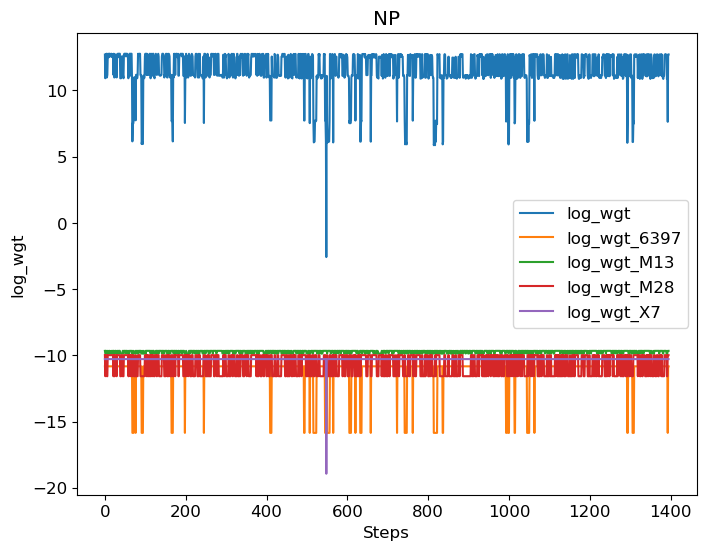

In [54]:
plt.figure(figsize=(8,6))
plt.plot(log_wgt, label='log_wgt')
#plt.plot(log_wgt_pop, label='log_wgt_pop')
#plt.plot(log_wgt_6304, label='log_wgt_6304')
plt.plot(log_wgt_6397, label='log_wgt_6397')
plt.plot(log_wgt_M13, label='log_wgt_M13')
plt.plot(log_wgt_M28, label='log_wgt_M28')
#plt.plot(log_wgt_M30, label='log_wgt_M30')
#plt.plot(log_wgt_wCen, label='log_wgt_wCen')
plt.plot(log_wgt_X7, label='log_wgt_X7')
#plt.plot(log_wgt_1810b, label='log_wgt_1810b')
#plt.plot(log_wgt_1724b, label='log_wgt_1724b')
#plt.plot(log_wgt_1702, label='log_wgt_1702')
#plt.plot(log_wgt_0030, label='log_wgt_0030')
#plt.plot(log_wgt_0740, label='log_wgt_0740')
plt.xlabel('Steps')
plt.ylabel('log_wgt')
plt.title('NP')
plt.legend()
plt.show()
